In [1]:
# Python program to find current
# weather details of any city
# using openweathermap api
# import required modules
import requests, json
import os
api_key = "05b51f50c88c882398ed44144e86224f"
base_url = "http://api.openweathermap.org/data/2.5/weather?"

complete_url = base_url + "q=" + 'Saclay' + "&appid=" + api_key
response = requests.get(complete_url)
x = response.json()
if x["cod"] != "404":
    y = x["main"]
    tempSaclay = y["temp"]
    pressSaclay = y["pressure"]
    humidSaclay = y["humidity"]
    z = x["weather"]
    weather_description = z[0]["description"]
else:
    print(" City Not Found ")
    
complete_url = base_url + "q=" + 'Marseille' + "&appid=" + api_key
response = requests.get(complete_url)
x = response.json()
if x["cod"] != "404":
    y = x["main"]
    tempMarseille = y["temp"]
    pressMarseille = y["pressure"]
    humidMarseille = y["humidity"]
else:
    print(" City Not Found ")
    
complete_url = base_url + "q=" + 'Lille' + "&appid=" + api_key
response = requests.get(complete_url)
x = response.json()
if x["cod"] != "404":
    y = x["main"]
    pressLille = y["pressure"]
else:
    print(" City Not Found ")

In [7]:
import paho.mqtt.client as mqtt
import json
import base64
import re

PSW = 'NNSXS.Z73HJOZDGASSNLZALUGMK3BZCQHFERGYYKQDLMQ.DRNU23S2HH3LPQ2B6XCIWYOH3ZYLWMX2SON7RHNA6TPHLI3UVCHA'

# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, rc):
    print('Connected with result code ' + str(rc))
    client.subscribe('v3/+/devices/+/up')
 
# The callback for when a PUBLISH message is received from the server.
def on_message(client, userdata, msg):    
    print(f"Received `{msg.payload.decode()}` from `{msg.topic}` topic")
    resultat = json.loads(msg.payload.decode())
    
    device = resultat['end_device_ids']
    deviceTTN = device['device_id']
    print(deviceTTN)
    
    if(deviceTTN == 'eui-70b3d57ed004c6f7'):
        uplink_message = resultat['uplink_message']
        payload_final = uplink_message['frm_payload']
        print(payload_final)
        print(base64.b64decode(payload_final))
        valeurPressionDevice1 = re.findall(r'\d+', base64.b64decode(payload_final).decode("utf-8"))
        print(valeurPressionDevice1)
    else:
        uplink_message = resultat['uplink_message']
        payload_final = uplink_message['frm_payload']
        print(payload_final)
        print(base64.b64decode(payload_final))
        valeurPressionDevice2 = re.findall(r'\d+', base64.b64decode(payload_final).decode("utf-8"))
        print(valeurPressionDevice2)
    
 
client = mqtt.Client()
client.on_connect = on_connect
client.on_message = on_message
client.tls_set()
client.username_pw_set('app-test-ttn',PSW)
 
client.connect('eu1.cloud.thethings.network', 8883, 60)
 
client.loop_forever()

Connected with result code 0
Received `{"end_device_ids":{"device_id":"eui-70b3d57ed004c6f7","application_ids":{"application_id":"app-test-ttn"},"dev_eui":"70B3D57ED004C6F7","join_eui":"0000000000000000","dev_addr":"260B194E"},"correlation_ids":["as:up:01FYTZH6RDJ39NG6DF7XNJP014","gs:conn:01FYTYA91A78T5MG4NZS24H1P8","gs:up:host:01FYTYA91HBVRMEPG93857KJP5","gs:uplink:01FYTZH6HYBD7TSM74WD87Z6RN","ns:uplink:01FYTZH6HZQMJ05VZCQKFBDH0Q","rpc:/ttn.lorawan.v3.GsNs/HandleUplink:01FYTZH6HZPBYDXWB0R3HDF6HB","rpc:/ttn.lorawan.v3.NsAs/HandleUplink:01FYTZH6RDRM9AVR792YE0AVM1"],"received_at":"2022-03-23T08:50:43.085595831Z","uplink_message":{"session_key_id":"AX+19UaeK7Y0bHnfZaIXmA==","f_port":2,"f_cnt":7,"frm_payload":"UHJlc3Npb246IDc1OW1tSGc=","decoded_payload":{"message":"Pression: 759mmHg"},"rx_metadata":[{"gateway_ids":{"gateway_id":"iot-lab-saclay-gateway"},"time":"2022-03-23T08:50:42Z","timestamp":1286943164,"rssi":-85,"channel_rssi":-85,"snr":12,"location":{"latitude":48.71503122196953,"long

KeyboardInterrupt: 

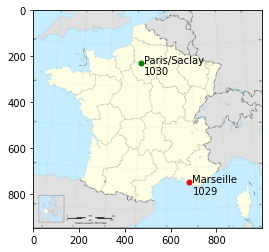

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
#import PIL.Image

image = mpimg.imread("carte_france.png")
#pts = np.array([[250,450],[950,620],[692,450],[587,450]])

plt.imshow(image)
plt.plot(470, 230, "og", markersize=5)  # og:shorthand for green circle
plt.text(485,230,'Paris/Saclay',horizontalalignment='left')
plt.text(485,280,str(pressSaclay),horizontalalignment='left')


#plt.scatter(pts[:, 0], pts[:, 1], marker=".", color="red", s=200)

plt.plot(680, 750, "or", markersize=5)
plt.text(695,750,'Marseille',horizontalalignment='left')
plt.text(695,800, str(pressMarseille),horizontalalignment='left')

plt.show()

In [ ]:
CODE POUR PUBLIER

In [16]:
# Ne marche pas à modifier

import base64

valeurPressionDevice2 = valeurPressionDevice2 * 1.33322
difference = pressSaclay - valeurPressionDevice2
message = "Différence de "+ str(difference) +"avec la valeur réelle"

print(base64.b64encode(message).decode())

In [17]:
# Message à faire à la main

import base64

payload = b"the message to send"

print(base64.b64encode(payload).decode())

dGhlIG1lc3NhZ2UgdG8gc2VuZA==


In [ ]:
Commande Terminal pour envoyer sur notre première device

mosquitto_pub -h eu1.cloud.thethings.network --cafile riot/lorawan/ttn-mqtt/isrgrootx1.pem -p 8883 -t 'v3/app-test-ttn@ttn/devices/eui-70b3d57ed004c6f7/down/push' -u 'app-test-ttn@ttn' -P 'NNSXS.Z73HJOZDGASSNLZALUGMK3BZCQHFERGYYKQDLMQ.DRNU23S2HH3LPQ2B6XCIWYOH3ZYLWMX2SON7RHNA6TPHLI3UVCHA' -m '{"downlinks":[{"f_port": 42,"frm_payload":"QUhBSEFIQUg=","priority": "NORMAL"}]}'

In [ ]:
Commande Terminal pour envoyer sur notre deuxième device

mosquitto_pub -h eu1.cloud.thethings.network --cafile riot/lorawan/ttn-mqtt/isrgrootx1.pem -p 8883 -t 'v3/app-test-ttn@ttn/devices/eui-70b3d57ed004d300/down/push' -u 'app-test-ttn@ttn' -P 'NNSXS.Z73HJOZDGASSNLZALUGMK3BZCQHFERGYYKQDLMQ.DRNU23S2HH3LPQ2B6XCIWYOH3ZYLWMX2SON7RHNA6TPHLI3UVCHA' -m '{"downlinks":[{"f_port": 42,"frm_payload":"QUhBSEFIQUg=","priority": "NORMAL"}]}'